# HSMA Exercise

The data loaded in this exercise is for seven acute stroke units, and whether a patient receives clost-busting treatment for stroke.  There are lots of features, and a description of the features can be found in the file stroke_data_feature_descriptions.csv.

Train a Logistic Regression model to try to predict whether or not a stroke patient receives clot-busting treatment.  Use the prompts below to write each section of code.

What do you conclude are the most important features for predicting whether a patient receives clot busting treatment?  Can you improve accuracy by changing the size of your train / test split?  If you have time, perhaps consider dropping some features from your data based on your outputs (in the same way you dropped passengerID in the Titanic example).  Don't forget you'll need to rerun all subsequent cells if you make changes like that.

In [1]:
import pandas as pd
import numpy as np
# Import machine learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Download data 
# (not required if running locally and have previously downloaded data)

download_required = True

if download_required:
    
    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '2004_titanic/master/jupyter_notebooks/data/hsma_stroke.csv'        
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data to data subfolder
    data.to_csv(data_directory + 'hsma_stroke.csv', index=False)
    
# Load data    
data = pd.read_csv('data/hsma_stroke.csv')
# Make all data 'float' type
data = data.astype(float)
# Show data
data.head()

,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,...,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,...,2.0,0.0,4.0,1.0,4.0,0.0,1.0,2.0,2.0,1.0


Look at an overview of the data.

In [2]:
data.describe()
data 

,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,...,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,0.403330,0.159506,0.142320,0.154672,0.165414,0.055854,0.113319,0.208915,0.515575,74.553706,...,1.114930,1.002148,0.963480,0.963480,0.910849,0.216971,0.610097,0.944146,0.739527,0.566595
std,0.490698,0.366246,0.349472,0.361689,0.371653,0.229701,0.317068,0.406643,0.499892,12.280576,...,0.930527,1.479211,1.441594,1.406501,1.380606,0.522643,0.771932,1.121379,0.731083,0.794000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,76.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,83.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000


There is a wide interhospital variation in the  rates of thrombolysis. 

In [8]:
data_clotbuster_given = data[data['Clotbuster given'] > 0]
data_clotbuster_not_given = data[data['Clotbuster given'] < 1]

Compare mean feature values for those who were given a clotbuster vs those that weren't.  What do you notice?

In [9]:
data_clotbuster_given.describe()


,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
count,751.0,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,1.0,0.203728,0.122503,0.182423,0.137150,0.067909,0.123835,0.162450,0.515313,73.303595,...,1.407457,1.215712,1.073236,1.165113,0.977364,0.214381,0.762983,1.181092,0.902796,0.762983
std,0.0,0.403038,0.328085,0.386450,0.344235,0.251758,0.329613,0.369109,0.500099,12.563268,...,0.898382,1.586213,1.488163,1.476720,1.379186,0.519596,0.799842,1.141561,0.726548,0.830912
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,75.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,83.000000,...,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000


In [10]:
data_clotbuster_not_given.describe()


,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
count,1111.0,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.0,0.129613,0.155716,0.135914,0.184518,0.047705,0.106211,0.240324,0.515752,75.398740,...,0.917192,0.857786,0.889289,0.827183,0.865887,0.218722,0.506751,0.783978,0.629163,0.433843
std,0.0,0.336028,0.362749,0.342851,0.388081,0.213237,0.308246,0.427473,0.499977,12.017943,...,0.899640,1.384447,1.405069,1.340572,1.380370,0.524920,0.735030,1.078936,0.713584,0.739422
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,76.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,84.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000


Divide the data into features and labels.

In [11]:
X = data.drop('Clotbuster given',axis=1) #   Features
y = data['Clotbuster given'] # Target variable

Perform appropriate feature scaling.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # 75% training data, 25% test data; this function returns 4 datasets

def standardise_data(X_train, X_test):
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Apply the scaler to the training and test sets
    train_std=sc.fit_transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

X_train_std, X_test_std = standardise_data(X_train, X_test)


Fit a Logistic Regression model.

In [20]:
model = LogisticRegression()
model.fit(X_train_std,y_train)


LogisticRegression()

Use the trained model to predict labels in both training and test sets, and calculate and compare accuracy.

In [29]:
# Predict training and test set labels
y_pred_train = model.predict(X_train_std)
y_pred_test = model.predict(X_test_std)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train}')
print (f'Accuracy of predicting test data = {accuracy_test}')

Accuracy of predicting training data = 0.828080229226361
Accuracy of predicting test data = 0.7896995708154506


Examine the feature weights to see what the most important features are.  What do you conclude?

In [28]:
co_eff = model.coef_[0]

co_eff_df = pd.DataFrame() # create empty DataFrame
co_eff_df['feature'] = list(X) # Get feature names from X
co_eff_df['co_eff'] = co_eff #co efficiency number
co_eff_df['abs_co_eff'] = np.abs(co_eff) 
co_eff_df.sort_values(by='abs_co_eff', ascending=False, inplace=True)
co_eff_df['odds'] = np.exp(co_eff_df['co_eff'])
co_eff_df['probability'] = co_eff_df['odds'] / (1 + co_eff_df['odds'])
co_eff_df


,feature,co_eff,abs_co_eff,odds,probability
33,Stroke Type_PIH,-1.134912,1.134912,0.321450,0.243256
32,Stroke Type_I,1.134912,1.134912,3.110900,0.756744
35,S2NihssArrival,-0.751923,0.751923,0.471459,0.320402
29,Stroke severity group_3. Moderate,0.642103,0.642103,1.900473,0.655229
28,Stroke severity group_2. Minor,-0.582997,0.582997,0.558223,0.358243
47,S2NihssArrivalBestLanguage,0.556879,0.556879,1.745217,0.635730
34,S2RankinBeforeStroke,-0.479383,0.479383,0.619165,0.382398
27,Stroke severity group_1. No stroke symtpoms,-0.439365,0.439365,0.644445,0.391892
17,Atrial Fib,-0.352240,0.352240,0.703112,0.412839
24,Anticoag before stroke_0,0.351130,0.351130,1.420672,0.586892


['Onset Time Known Type_P', 'Atrial Fib', 'TIA', 'Anticoag before stroke_0', 'Anticoag before stroke_1', 'Stroke severity group_1. No stroke symtpoms', 'Stroke severity group_2. Minor', 'Stroke severity group_3. Moderate', 'Stroke Type_I', 'Stroke Type_PIH']
0.7951289398280802 0.759656652360515
Coefficients: [[ 1.28295439 -0.61691557 -0.83951349  1.11109204 -0.61505991 -2.8038523
  -2.62278491  0.30484063  2.37789233 -2.35953533]]
Intercept: [-2.66496905]


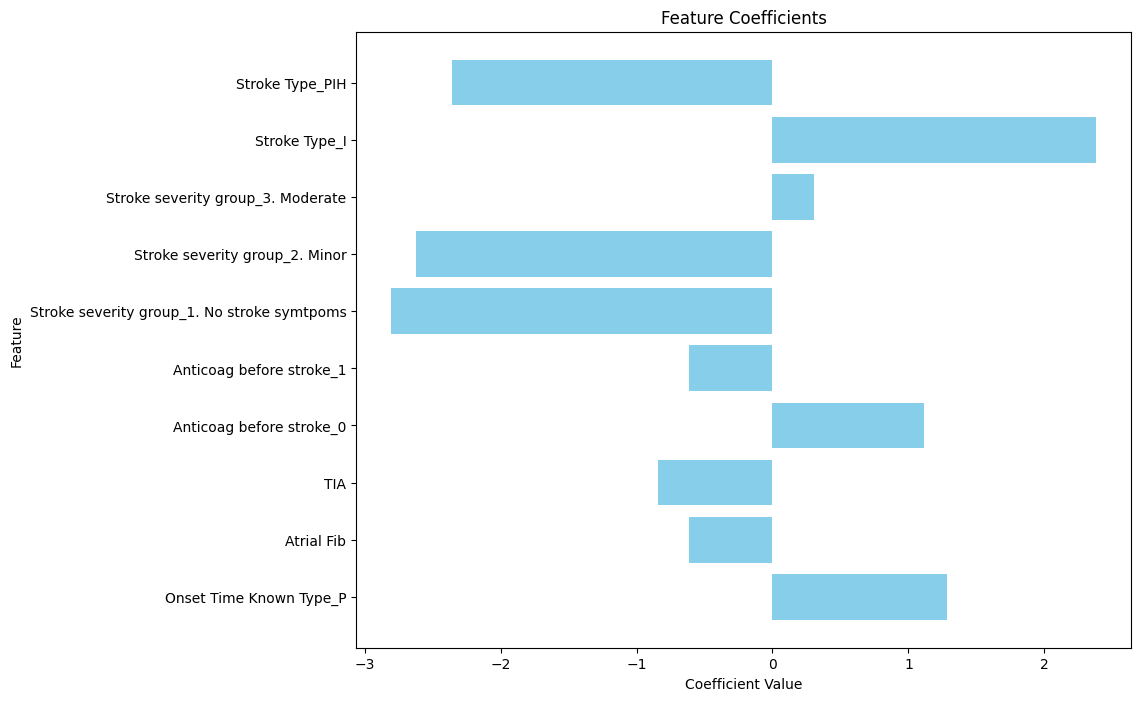

In [41]:
from sklearn.feature_selection import RFE



# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# RFE
rfe = RFE(estimator=model, n_features_to_select=10)  # Adjust n_features_to_select as needed
fit = rfe.fit(X_train, y_train)

# Print the selected features
selected_features = pd.Series(fit.support_, index=X.columns)
print(selected_features[selected_features==True].index.tolist())

# Predict training and test set labels
y_pred_train = fit.predict(X_train)
y_pred_test = fit.predict(X_test)

accuracy_train = np.mean(y_pred_train == y_train)

accuracy_test = np.mean(y_pred_test == y_test)

print(accuracy_train, accuracy_test)

# Extract the coefficients
coefficients = fit.estimator_.coef_

# Extract the intercept
intercept = fit.estimator_.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

import matplotlib.pyplot as plt

# Assuming `selected_features` contains the names of the features selected by RFE
feature_names = selected_features[selected_features==True].index.tolist()

# Flatten the coefficients for plotting
coefficients_flat = coefficients.flatten()

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients_flat, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))


In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients_flat, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

In reality we would use stratified k-fold cross validation. This can be done using the cross_val_score function from sklearn.model_selection.  

# Prediction thresholds:

Receiver Operator Characteristic (ROC) Curves are really useful in assessing the potential performance of a Machine Learning algorithm.

They plot the True Positive Rate (proportion of cases correctly identified as positive out of all positive cases; sensitivity) against the False Positive Rate (proportion of cases incorrectly identified as positive out of all negative cases, or 1 – specificity, or FP / (FP + TN)).  For example, a False Positive Rate of 20% would mean that 20% of cases that are negative we would incorrectly classify as being positive.

We plot these rates for varying prediction thresholds. The prediction threshold is the value above which we classify something as positive (and below which, something is classified as negative). By default, this is usually 0.5, but that may not always be the best threshold, particularly for imbalanced datasets.

A ROC curve allows us to assess if we could get better performance with a different threshold, or if the model just isn’t going to work as it stands.


A Receiver Operating Characteristic (ROC) curve is a graphical plot used to evaluate the performance of a binary classification model. It illustrates the tradeoff between the true positive rate (sensitivity) and the false positive rate (1 - specificity) at various classification thresholds. Here's a breakdown of what an ROC curve plots:

X-axis: False Positive Rate (FPR)

Also known as 1 - Specificity
Calculated as: FPR = False Positives / (False Positives + True Negatives)


Y-axis: True Positive Rate (TPR)

Also known as Sensitivity or Recall
Calculated as: TPR = True Positives / (True Positives + False Negatives)



Key points about ROC curves:

Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold.

AUROC stands for Area Under the Receiver Operating Characteristic curve. It's a single scalar value that summarizes the performance of a binary classification model across all possible thresholds. Let's break this down:

What it represents:

AUROC is the area under the ROC curve we discussed earlier.
It ranges from 0 to 1, where 1 is perfect classification and 0.5 is no better than random guessing.


Interpretation:

0.5: No discriminative ability (equivalent to random guessing)
0.7-0.8: Acceptable discrimination
0.8-0.9: Excellent discrimination


0.9: Outstanding discrimination




Advantages:

Threshold-independent: It evaluates the model's performance across all possible classification thresholds.
Scale-invariant: It's not affected by changes in the scale of probabilities.
Class-balance invariant: It's not sensitive to class imbalance.


Calculation:

Geometrically, it's the area under the ROC curve.
Statistically, it represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.


Use cases:

Comparing different models: Higher AUROC generally indicates better performance.
Single metric for model selection: Useful when you need one number to represent model performance.


Limitations:

Doesn't provide information about the actual predicted probabilities.
May be less informative when dealing with highly imbalanced datasets.


In practice:

Often used in conjunction with other metrics like precision, recall, and F1-score.
Particularly useful in medical diagnostics, fraud detection, and other binary classification problems.



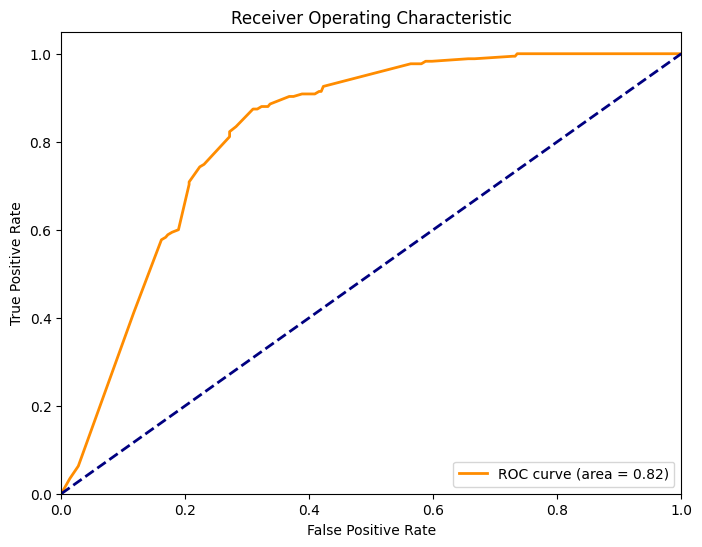

In [44]:
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_prob_test = fit.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [42]:
from sklearn.metrics import roc_auc_score

# Assuming y_true are the true labels and y_pred are the predicted probabilities
auroc = roc_auc_score(y_train, y_pred_train)
print(f"AUROC: {auroc}")



AUROC: 0.8036543021680217
